Импортируем необходимые библиотеки


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

Считаем данные

1.  Adult Mortality - number of dying between 15 and 60 years per 1000 population
2.  percentage expenditure - Расходы на здравоохранение в процентах от валового внутреннего продукта на душу населения (%)
3.  Measles - корь, число зарегистрированных случаев на 1000 человек населения
4.  BMI - Средний индекс массы тела всего населения
5.  Polio - Охват иммунизацией от полиомиелита (Pol3) среди детей в возрасте до 1 года (%)
6.  Total expenditure - Общие государственные расходы на здравоохранение в процентах от общих государственных расходов (%)
7.  Diphtheria - Охват иммунизацией против дифтерии, столбнячного анатоксина и коклюша (DTP3) среди детей в возрасте до 1 года (%)
8.  HIV/AIDS - Смертность на 1 000 живорождений ВИЧ/СПИД (0-4 года)
9. 	GDP	- ВВП
10. Population
11.	thinness 1-19 years - Распространенность худобы среди детей и подростков в возрасте от 10 до 19 лет (% )
12.	thinness 5-9 years	
13. Income composition of resources - Индекс человеческого развития с точки зрения структуры доходов и ресурсов (индекс в диапазоне от 0 до 1)
14.	Schooling - Количество лет обучения в школе (лет)

In [ ]:
df = pd.read_csv('/content/Life_train.csv')
test = pd.read_csv('/content/Life_test.csv')
df.head(5)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
3,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
4,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2


In [ ]:
df.nunique()

Year                                 16
Life expectancy                     358
Adult Mortality                     413
infant deaths                       196
Alcohol                             996
percentage expenditure             1967
Hepatitis B                          85
Measles                             841
 BMI                                586
under-five deaths                   242
Polio                                73
Total expenditure                   787
Diphtheria                           81
 HIV/AIDS                           188
GDP                                2103
Population                         1932
 thinness  1-19 years               197
 thinness 5-9 years                 199
Income composition of resources     612
Schooling                           172
dtype: int64

In [ ]:
df.columns, test.columns

(Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
        'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
        'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
        ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
        ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
       dtype='object'),
 Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
        'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
        'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
        ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
        ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
       dtype='object'))

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2489.000000,2489.000000,2489.000000,2489.000000,2322.000000,2489.000000,2009.000000,2489.000000,2461.000000,2489.000000,2471.000000,2293.000000,2471.000000,2489.000000,2103.000000,1.935000e+03,2461.000000,2461.000000,2343.00000,2343.000000
mean,2007.453998,69.135677,165.517075,31.925271,4.600060,719.997905,80.884520,2508.917638,38.197887,44.378063,82.441926,5.952891,82.095508,1.777581,7320.511081,1.267212e+07,4.837424,4.882974,0.62521,11.932864
std,4.593657,9.626188,125.091120,122.898636,4.021613,1968.953987,25.110227,11795.371317,19.919937,167.571112,23.423987,2.489485,23.948337,5.184826,14023.224494,6.032759e+07,4.435967,4.546285,0.21130,3.387830
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,4.100000e+01,0.100000,0.100000,0.00000,0.000000
25%,2003.000000,63.000000,74.000000,0.000000,0.902500,4.344931,77.000000,0.000000,19.300000,0.000000,77.000000,4.280000,78.000000,0.100000,462.318087,2.062425e+05,1.600000,1.500000,0.48800,10.000000
50%,2007.000000,72.100000,144.000000,3.000000,3.775000,64.605901,92.000000,15.000000,43.200000,4.000000,93.000000,5.780000,93.000000,0.100000,1757.177970,1.395398e+06,3.300000,3.400000,0.67600,12.300000
75%,2011.000000,75.700000,228.000000,23.000000,7.677500,431.545247,97.000000,357.000000,56.200000,29.000000,97.000000,7.500000,97.000000,0.800000,5903.413690,7.321861e+06,7.200000,7.200000,0.77900,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.310000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.94800,20.600000


In [ ]:
df.isna().sum()

Year                                 0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            167
percentage expenditure               0
Hepatitis B                        480
Measles                              0
 BMI                                28
under-five deaths                    0
Polio                               18
Total expenditure                  196
Diphtheria                          18
 HIV/AIDS                            0
GDP                                386
Population                         554
 thinness  1-19 years               28
 thinness 5-9 years                 28
Income composition of resources    146
Schooling                          146
dtype: int64

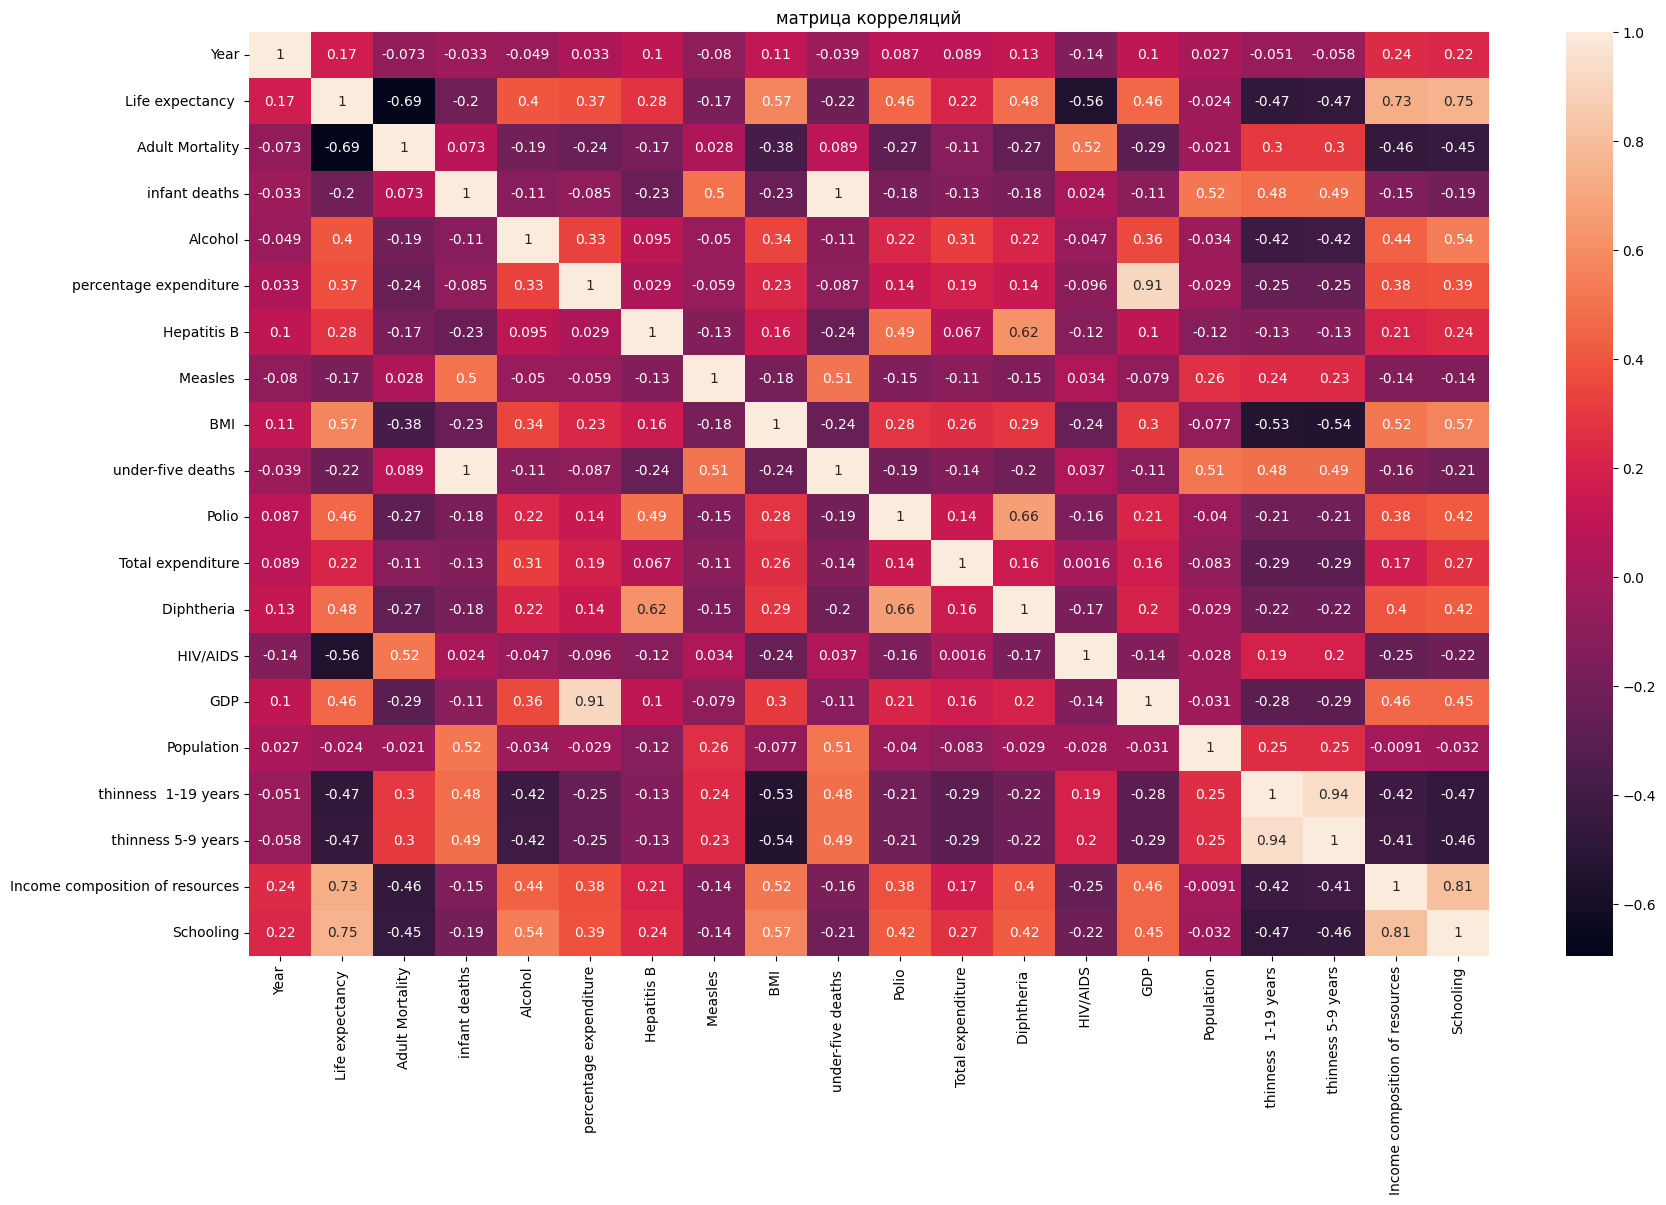

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True)
plt.title("матрица корреляций");

In [ ]:
def check_score(X_train, test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    print(f"MSE Score: {mean_squared_error(y_test, pred)}")

Заполним пропущенные значения

In [ ]:
#1 способ
df_check = df.fillna(df.mean())
X = df_check.drop(columns = 'Life expectancy ')
y = df_check['Life expectancy ']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
check_score(X_train, X_val, y_train, y_val)

MSE Score: 17.494565148637353


In [ ]:
#2 cпособ

imputer = KNNImputer(n_neighbors=4)
df_check = pd.DataFrame(imputer.fit_transform(df))
df_check.columns = df.columns
df_check.index = df.index
X = df_check.drop(columns = 'Life expectancy ')
y = df_check['Life expectancy ']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
check_score(X_train, X_val, y_train, y_val)

MSE Score: 16.534030688561618


In [ ]:
#3 cпособ

imputer = IterativeImputer()
df_check = pd.DataFrame(imputer.fit_transform(df))
df_check.columns = df.columns
df_check.index = df.index
X = df_check.drop(columns = 'Life expectancy ')
y = df_check['Life expectancy ']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
check_score(X_train, X_val, y_train, y_val)

MSE Score: 16.2103368259244


In [ ]:
imputer = IterativeImputer()
test_check = pd.DataFrame(imputer.fit_transform(test))
test_check.columns = test.columns
test_check.index = test.index

df = df_check.copy()
test = test_check.copy()

In [ ]:
test.isna().sum()

Year                               0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
df.isna().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
X = df.drop(columns = 'Life expectancy ')
y = df['Life expectancy ']

In [ ]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
X[X.columns] = scaler.fit_transform(X)
test[test.columns] = scaler.fit_transform(test)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Генерация признаков

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

new_columns = []
for i in range(X_poly.shape[1]):
    if i == 0:
        new_columns.append('1')
    elif i <= X.shape[1]:
        new_columns.append(f'x{i}')
    else:
        new_columns.append(f'x{i}_poly')

X_poly_df = pd.DataFrame(X_poly, columns=new_columns)

X = pd.concat([X, X_poly_df], axis=1)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(2)
test_poly = poly.fit_transform(test)

new_columns = []
for i in range(test_poly.shape[1]):
    if i == 0:
        new_columns.append('1')
    elif i <= test.shape[1]:
        new_columns.append(f'x{i}')
    else:
        new_columns.append(f'x{i}_poly')

test_poly_df = pd.DataFrame(test_poly, columns=new_columns)

test = pd.concat([test, test_poly_df], axis=1)


In [ ]:
X

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,x200_poly,x201_poly,x202_poly,x203_poly,x204_poly,x205_poly,x206_poly,x207_poly,x208_poly,x209_poly
0,1.421024,0.924088,1.358469,-1.325726,0.103009,-1.045288,0.975651,-0.949229,1.336240,-1.535463,...,3.579870,3.553685,-1.667759,-1.202444,3.527691,-1.655560,-1.193649,0.776961,0.560184,0.403889
1,1.205702,0.906932,1.369377,-1.325726,0.101497,-0.963308,0.944602,-0.976284,1.347970,-1.384981,...,3.630451,3.604411,-1.726337,-1.264918,3.578559,-1.713955,-1.255846,0.820901,0.601489,0.440722
2,0.989951,0.929781,1.385007,-1.325726,0.125437,-0.833786,1.334499,-1.003441,1.362893,-1.171427,...,3.680790,3.667593,-1.792621,-1.327805,3.654444,-1.786194,-1.323044,0.873043,0.646668,0.478991
3,0.773831,0.946789,1.394973,-1.325726,-0.702102,-0.788846,1.348970,-1.025242,1.377067,-1.125184,...,3.755851,3.730216,-1.880347,-1.503926,3.704757,-1.867513,-1.493661,0.941386,0.752932,0.602205
4,0.557303,0.969298,1.409299,-1.325726,0.132358,-0.877840,1.270328,-1.052590,1.393830,-1.216475,...,3.805594,3.780136,-1.938766,-1.675378,3.754848,-1.925796,-1.664171,0.987707,0.853524,0.737570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,-0.531326,2.772489,1.037299,0.117375,-0.637063,-0.921012,0.939128,-0.482008,1.081738,-1.077732,...,1.225025,1.204580,-1.274539,-0.920140,1.184476,-1.253268,-0.904783,1.326054,0.957331,0.691135
2485,-0.750246,2.791731,1.021899,0.170937,-1.433746,-0.788846,0.235033,-0.502503,1.072504,-1.171427,...,1.341563,1.320138,-1.329607,-0.994734,1.299055,-1.308373,-0.978848,1.317758,0.985870,0.737570
2486,-0.969593,2.766054,1.005804,0.097596,-1.433746,-2.110787,1.130899,-0.523039,1.063006,-2.284317,...,1.458262,1.450473,-1.337743,-0.937109,1.442725,-1.330597,-0.932103,1.227184,0.859661,0.602205
2487,-1.189330,-0.639800,0.988954,0.187732,-1.433746,-0.550698,0.862399,-0.543618,1.053230,-0.875552,...,1.069305,0.981090,1.110890,0.657177,0.900152,1.019244,0.602961,1.154091,0.682734,0.403889


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
check_score(X_train, X_val, y_train, y_val)

MSE Score: 6.879676552791504


In [ ]:
# cont_vars = list(df.columns)[3:]
# def outliers_visual(data):
#     plt.figure(figsize=(15, 40))
#     i = 0
#     for col in cont_vars:
#         i += 1
#         plt.subplot(9, 4, i)
#         plt.boxplot(data[col])
#         plt.title('{} boxplot'.format(col))
#     plt.show()
# outliers_visual(df)

In [ ]:
# for column in df.columns:
#       q25 = df[column].quantile(0.05)
#       q75 = df[column].quantile(0.95)
#       iqr = q75 - q25


#       lower_bound = q25 - 1.5 * iqr
#       upper_bound = q75 + 1.5 * iqr


#       df[(df[column] <= upper_bound)] == df[column].mean()

In [ ]:
# from sklearn.linear_model import Lasso

# lasso = Lasso(alpha = 0.1).fit(X, y)
# important_features = X.columns[lasso.coef_ != 0]
# X = X[important_features]

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
# check_score(X_train, X_val, y_train, y_val)

In [ ]:
# for col1, col2 in combinations(test.columns, 2):
#     test[f'{col1}*{col2}'] = test[col1] * test[col2]

# test = test[important_features]

In [ ]:
# X.columns = X.columns.astype(str)
clf = LinearRegression()
clf.fit(X,y)

LinearRegression()

In [ ]:
test.columns = test.columns.astype(str)
y_pred = clf.predict(test)
submit = pd.DataFrame(columns=['Life expectancy'])
submit['Life expectancy'] = y_pred
submit.index.name = 'Index'
submit.to_csv('submission.csv')

In [ ]:
submit

,Life expectancy
Index,
0,75.388829
1,75.120558
2,73.735976
3,55.799128
4,65.640940
...,...
434,62.626109
435,72.040195
436,74.862470
